In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [1]:
import tensorflow as tf
import os
import zipfile


DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.8% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

--2020-05-21 17:10:29--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.218.128, 2a00:1450:4013:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.218.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.01s   

2020-05-21 17:10:29 (226 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [2]:
train_happy_dir = os.path.join('/tmp/h-or-s/happy')
train_happy_pix = os.listdir(train_happy_dir)
print(train_happy_pix[:10])

['happy2-06.png', 'happy2-16.png', 'happy2-00.png', 'happy2-01.png', 'happy1-15.png', 'happy1-11.png', 'happy2-04.png', 'happy1-17.png', 'happy1-00.png', 'happy1-12.png']


In [3]:
train_sad_dir = os.path.join('/tmp/h-or-s/sad')
train_sad_pix = os.listdir(train_sad_dir)
print(train_sad_pix[:10])

['sad2-02.png', 'sad1-16.png', 'sad1-06.png', 'sad1-19.png', 'sad2-04.png', 'sad1-15.png', 'sad1-14.png', 'sad1-18.png', 'sad2-12.png', 'sad2-11.png']


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

(150, 150, 4)
(150, 150, 4)
(150, 150, 4)
(150, 150, 4)
(150, 150, 4)
(150, 150, 4)
(150, 150, 4)
(150, 150, 4)
(150, 150, 4)
(150, 150, 4)
(150, 150, 4)
(150, 150, 4)
(150, 150, 4)
(150, 150, 4)
(150, 150, 4)
(150, 150, 4)


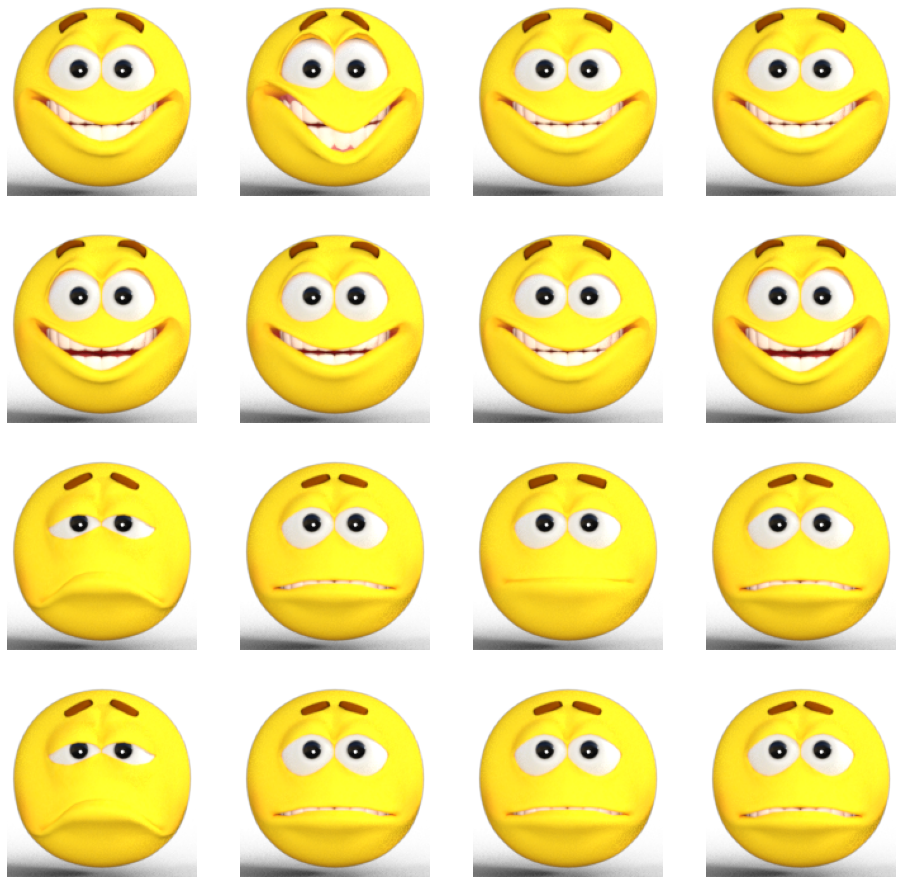

In [5]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_happy_pix = [os.path.join(train_happy_dir, fname) 
                for fname in train_happy_pix[pic_index-8:pic_index]]
next_sad_pix = [os.path.join(train_sad_dir, fname) 
                for fname in train_sad_pix[pic_index-8:pic_index]]

for i, img_path in enumerate(next_happy_pix+next_sad_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  print(img.shape)
  plt.imshow(img)

plt.show()

In [0]:
# This Code Block should Define and Compile the Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [8]:
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        '/tmp/h-or-s/',
        target_size=(150,150),
        batch_size = 8,
        class_mode = 'binary')

# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


In [9]:
# This code block should call model.fit and train for
# a number of epochs. 
history = model.fit(
      train_generator,
      epochs=10,
      verbose=2,
      callbacks=[callbacks])
    
# Expected output: "Reached 99.9% accuracy so cancelling training!""

Epoch 1/10
10/10 - 0s - loss: 0.7704 - accuracy: 0.6625
Epoch 2/10
10/10 - 0s - loss: 0.3642 - accuracy: 0.7875
Epoch 3/10
10/10 - 0s - loss: 0.1636 - accuracy: 0.9250
Epoch 4/10
10/10 - 0s - loss: 0.3129 - accuracy: 0.9125
Epoch 5/10
10/10 - 0s - loss: 0.1455 - accuracy: 0.9250
Epoch 6/10
10/10 - 0s - loss: 0.0482 - accuracy: 0.9875
Epoch 7/10
10/10 - 0s - loss: 0.0724 - accuracy: 0.9750
Epoch 8/10
10/10 - 0s - loss: 0.0356 - accuracy: 0.9875
Epoch 9/10

Reached 99.8% accuracy so cancelling training!
10/10 - 0s - loss: 0.0108 - accuracy: 1.0000
